In [1]:
from child import Child
import helper_functions
import matplotlib.pyplot as plt
from scipy.stats import t
%matplotlib inline

In [2]:
# Step 0: Read config file
config_file_path = 'phasing_config_file.txt'
with open(config_file_path, 'r') as f:
    config_elem = [line.strip().split('\t')[1] for line in f]
    
#print(config_elem)

In [3]:
# Step 1: Obtain names from ped file
names = helper_functions.ped_file_reader(config_elem[0])

In [ ]:
print(names)

In [4]:
# Step 2: Read in the vcf file and get only SNP list
df = helper_functions.read_VCF(config_elem[1], names)

C:\Users\rodriguezah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
df.tail()

In [5]:
# Step 3: Filter by specific chromosome and chromosome quality
chr7_df = helper_functions.filter_VCF_by_chr_and_SNP(df, 7)

In [ ]:
chr7_df.head()

In [6]:
# Step 4: Create list of children
children = [Child(names[i], names[0], names[1]) for i in range(2, len(names))]

In [7]:
# Step 5: Generate phasable SNP data for each child
for elem in children:
    elem.phasable_snp_determiner(chr7_df)

In [ ]:
print(children[0].name)
print(len(children[0].pos_arr))
print(children[0].dad_rd_array.size)
print(children[0].mom_rd_array.size)

In [ ]:
# Do analysis for UDP18111
window_sizes = [100, 500, 1000, 4000,10000, 16000,40000, 64000]
for child in children:
    for size in window_sizes:
        child.t_test_snps(size)
        # plot the data
        plt.figure()
        plt.plot(child.t_values)
        # plt.hlines(t.ppf(0.95, size-1).item(), 0, len(children[0].t_values))
        title = [child.name, "for sample size", str(size), "with", str(len(child.t_values)), "iterations"]
        plt.title(" ".join(title))
        plt.ylabel('t-values')
        plt.show()

In [8]:
# Step 6: Do sliding t-test for each child and see if possible mosaicism present
for elem in children:
    elem.t_test_snps(samp_size=10000)

Mosaicism has been detected in child UDP18111 with start and end points at VCF positions 147123281 and 159086440, respectively


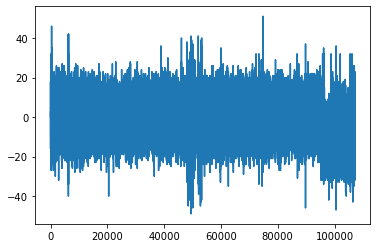

In [11]:
diff_arr = children[0].dad_rd_array[children[0].index_diff_arr_start_of_mosaicism:children[0].index_diff_arr_end_of_mosaicism] - children[0].mom_rd_array[children[0].index_diff_arr_start_of_mosaicism:children[0].index_diff_arr_end_of_mosaicism]
diff_arr = children[0].dad_rd_array - children[0].mom_rd_array
plt.plot(diff_arr)

In [ ]:
for elem in children:
    print(elem.vcf_pos_start_of_mosaicism)

In [ ]:
# Step 7: Check if a child is mosaic
mosaic_child_present = False
for elem in children:
    if elem.vcf_pos_start_of_mosaicism != 0:
        mosaic_child_present = True
        elem.edge_detection(50, 100, 0.5)

# if all clear, print out
if not mosaic_child_present:
    print("No child is mosaic")
else:
    print("A child is mosaic")

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import t
%matplotlib inline

In [ ]:
# Plot the t-values for UDP112828
plt.plot(children[0].naive_t_values)
plt.hlines(t.ppf(0.95, 10000-1).item(), 0, len(children[0].naive_t_values))
plt.title(children[0].name + " for sample size 10000")
plt.ylabel('t-values')